In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
import glob
from timeVAE.vae_dense_model import VariationalAutoencoderDense as VAE_Dense
from timeVAE.vae_conv_model import VariationalAutoencoderConv as VAE_Conv
from timeVAE.vae_conv_I_model import VariationalAutoencoderConvInterpretable as TimeVAE
from timeVAE import utils
from gretel_synthetics.timeseries_dgan.dgan import DGAN

base_data = np.load('../data/training_data/training_data_1month.npy', allow_pickle=True)

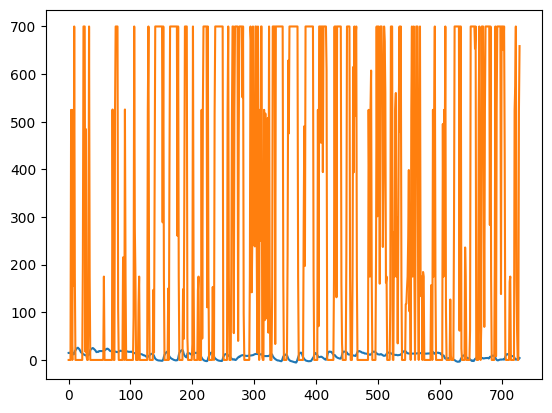

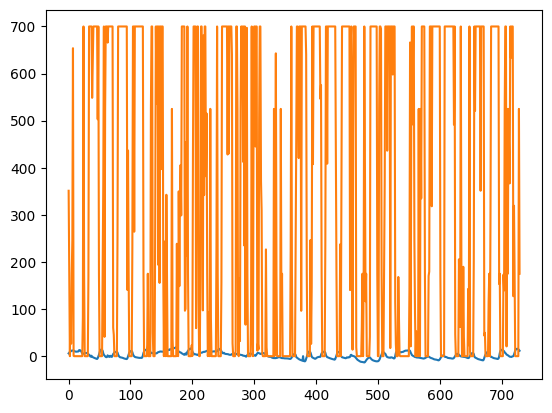

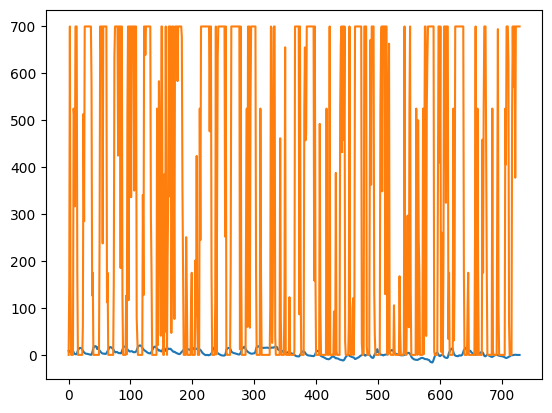

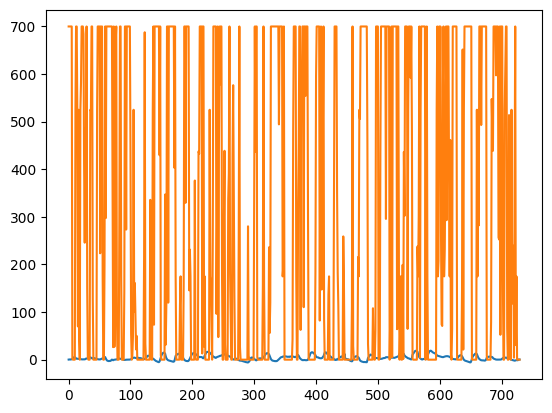

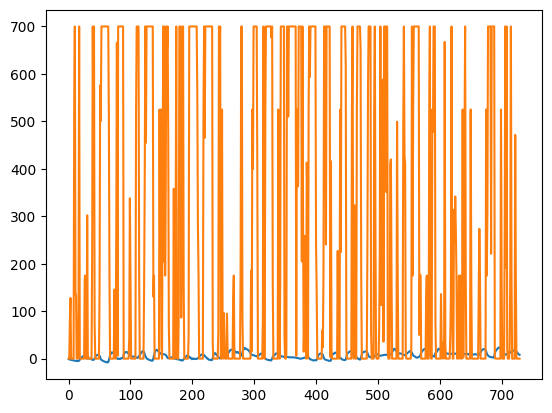

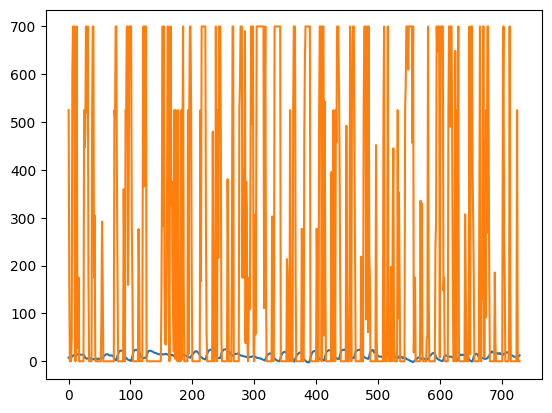

In [41]:
for i in range(6):
    plt.plot(base_data[0][i+10][:,[1,2]])
    #plt.plot(vae_list[i][0][0])
    #plt.xlim(0,100)
    plt.savefig(f'../../el_realimg{i}.png')
    plt.show()

In [16]:
M=1
prefix=f'{"th_v_air" if M==0 else "el_v_sky"}*_rescaled_samples'
vae_files = glob.glob(f'../data/vae_synthetic_data/{prefix}.npy')
gan_files = glob.glob(f'../data/gan_synthetic_data/{prefix}.npy')

print(len(vae_files), len(gan_files))
vae_data = [np.load(file) for file in vae_files]
gan_data = [np.load(file) for file in gan_files]

7 7


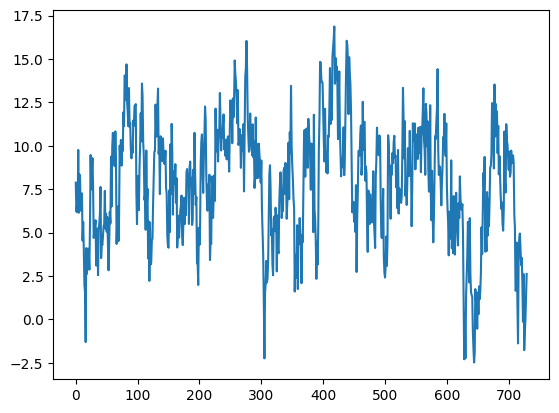

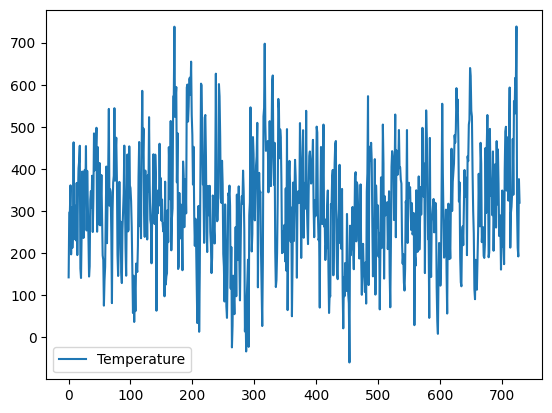

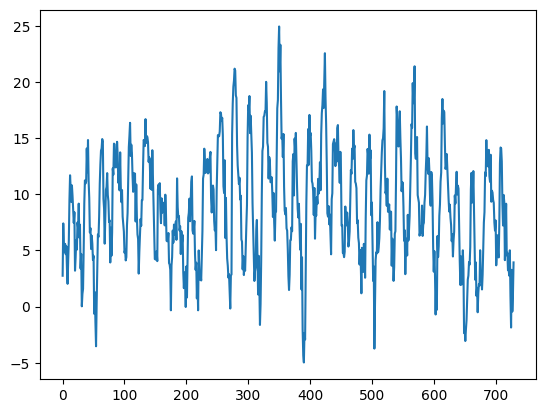

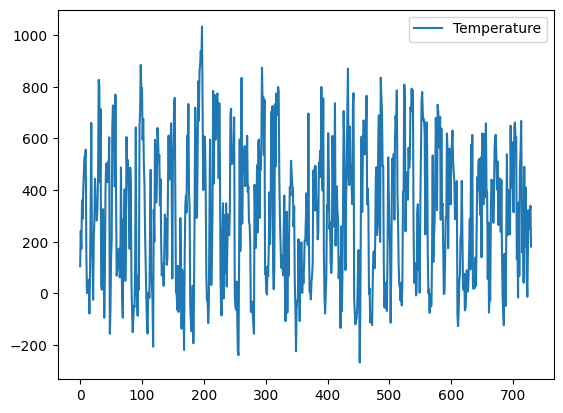

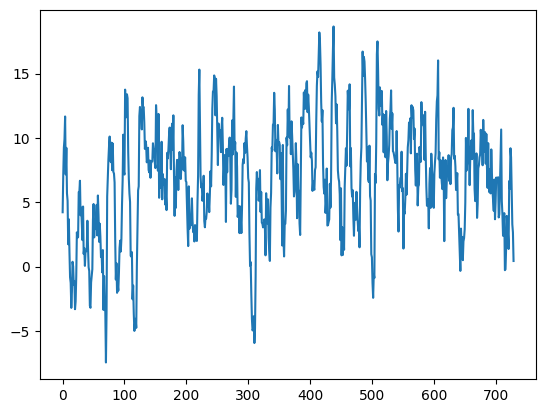

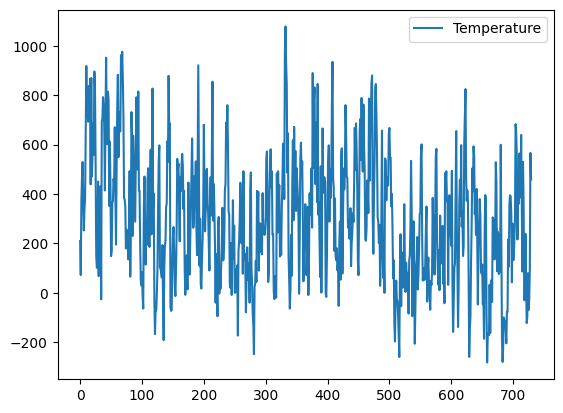

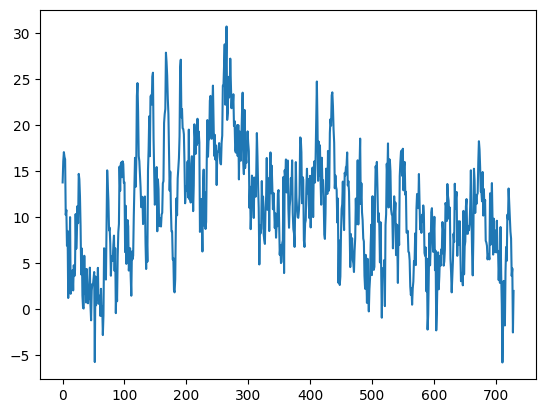

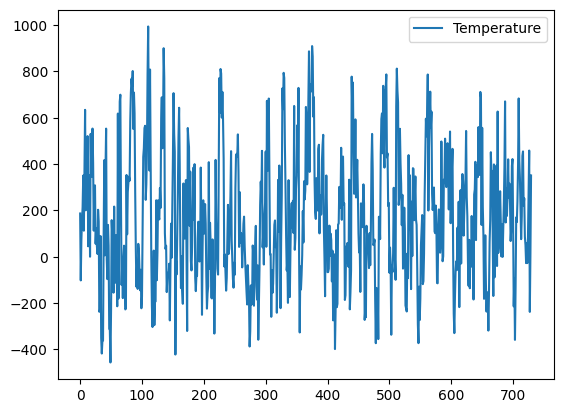

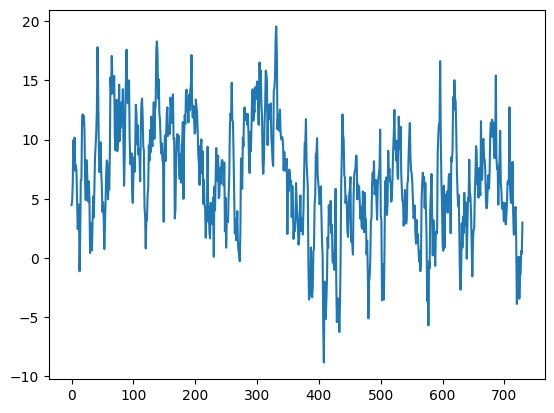

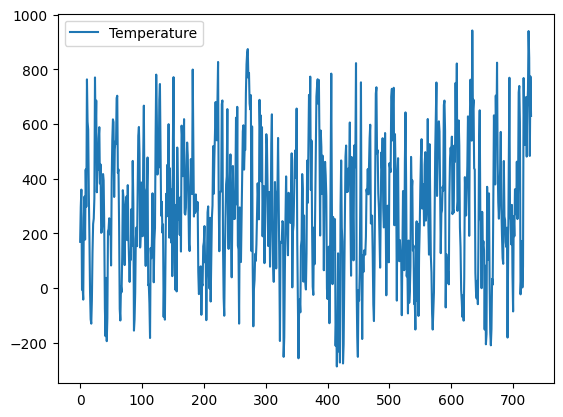

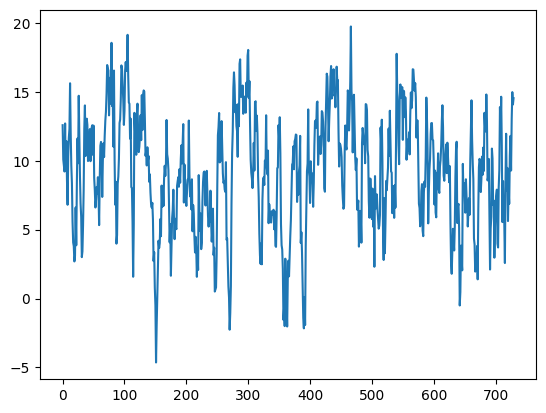

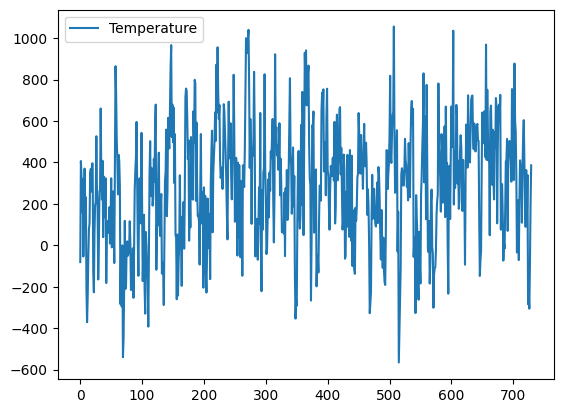

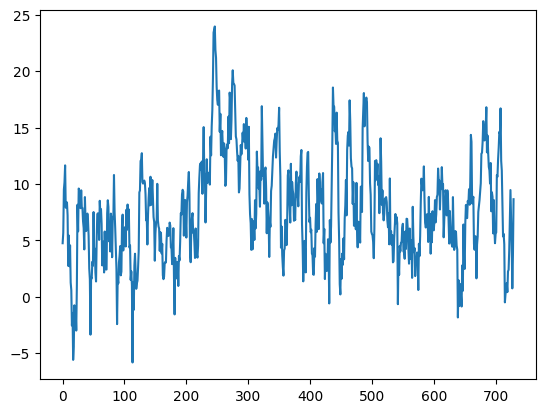

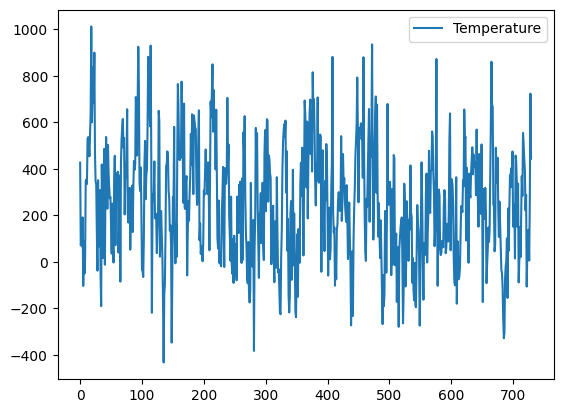

In [24]:
for i, vae in enumerate(vae_data):
    plt.plot(vae[0][:,0], label='Energy')
    plt.show()
    plt.plot(vae[0][:,1], label='Temperature')
    #plt.xlim(0,100)
    #plt.savefig(f'../../th_vaeimg{i}.png')
    plt.legend()
    plt.show()

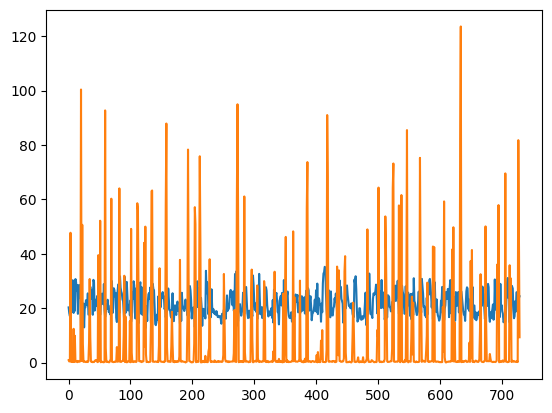

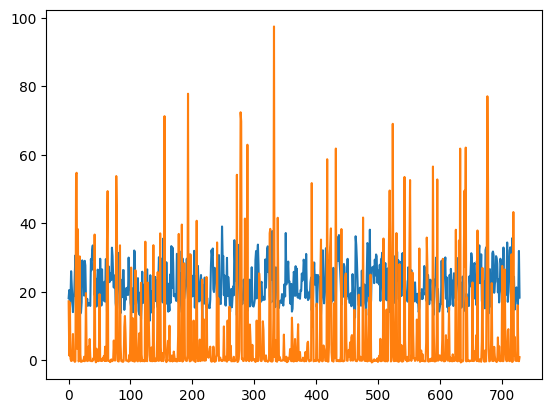

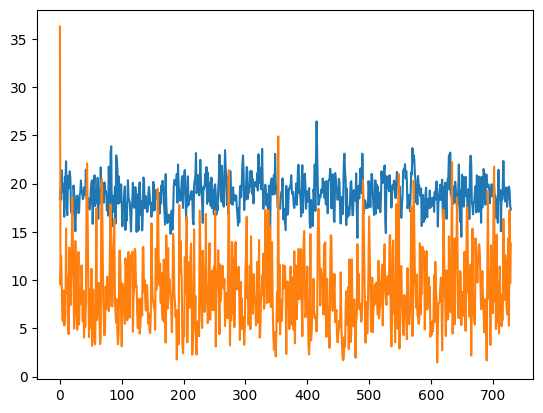

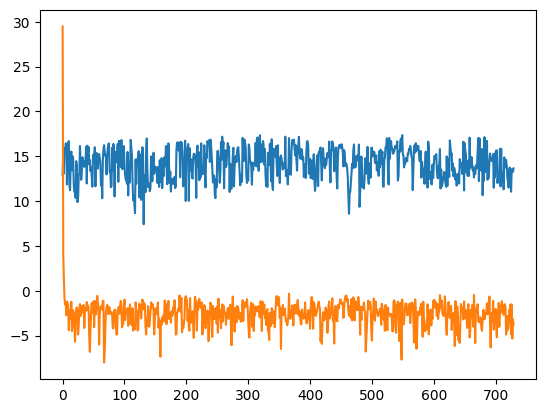

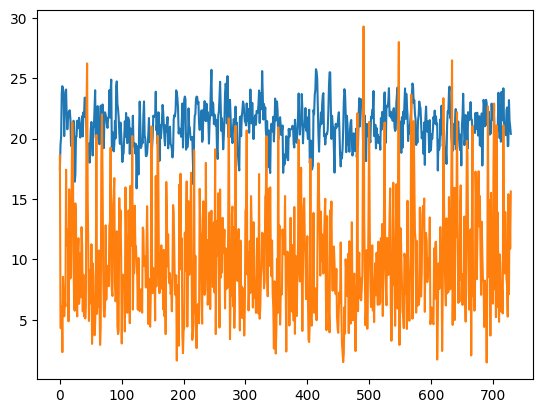

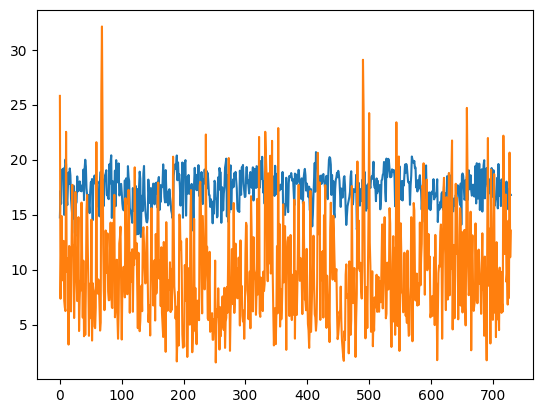

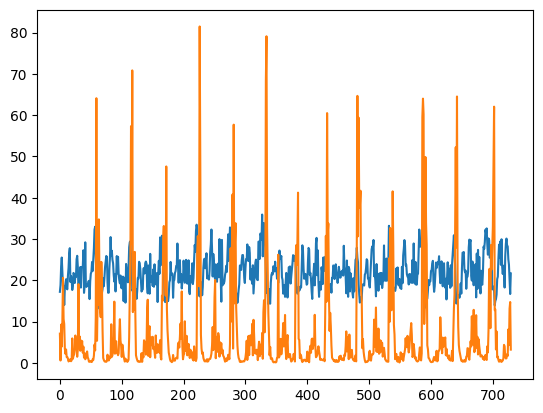

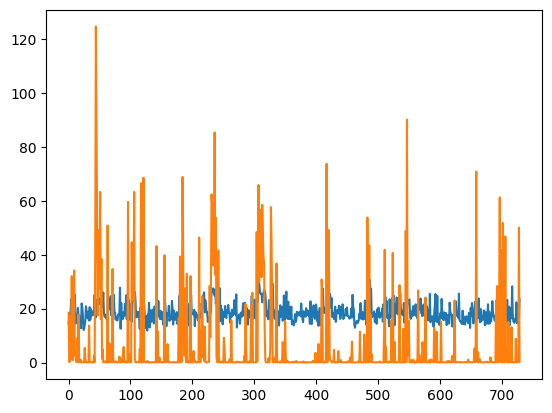

In [15]:
for i, vae in enumerate(gan_data):
    plt.plot(vae[0])
    #plt.xlim(0,100)
    plt.savefig(f'../../th_ganimg{i}.png')
    plt.show()

In [5]:
batches=[4,8,16,20,24,32]
latent_dims=[3,5,10,15,20,25,30,50]

vae_list = []
for b in batches:
    latent_dim_list = []
    for l in latent_dims:
        samples = TimeVAE.load('../data/models/model_data/',f'tVAE_{"th_v_air" if M==0 else "el_v_sky"}_b{b}l{l}')
        sample = samples.get_prior_samples(num_samples=1000)
        latent_dim_list.append(sample)
    vae_list.append(latent_dim_list)

2024-04-17 07:55:44,482 : MainThread : WARNING : From C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



32/32 [==============================] - 0s 7ms/step


In [3]:
import tensorflow as tf
import torch
# Hide GPU from visible devices
#tf.config.set_visible_devices([], 'GPU')
tf.config.get_visible_devices()
batches=[2,4,6,8,10,12,16,20,24,32]
epochs=[100,500,1000,2000,5000]


gan_list = []
for b in batches:
    epoch_list = []
    for e in epochs:
        try:
            model = DGAN.load(f'../data/models/GAN_models/DGAN_{"th_v_air" if M==0 else "el_v_sky"}_b{b}_e{e}.zip', map_location=torch.device('cpu'))
        except:
            model = DGAN.load(f'../data/models/GAN_models/DGAN_{"th_v_air" if M==0 else "el_v_sky"}_b{b}_e{e}', map_location=torch.device('cpu'))
            
        attributes, samples = model.generate_numpy(1000)
        epoch_list.append(samples)
    gan_list.append(epoch_list)

KeyboardInterrupt: 

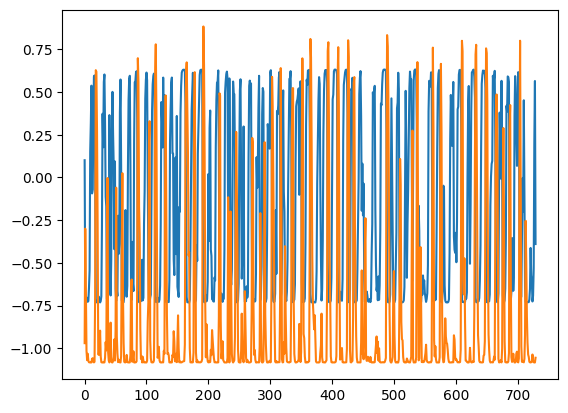

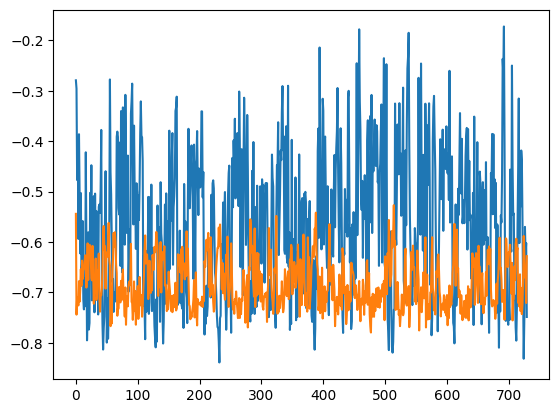

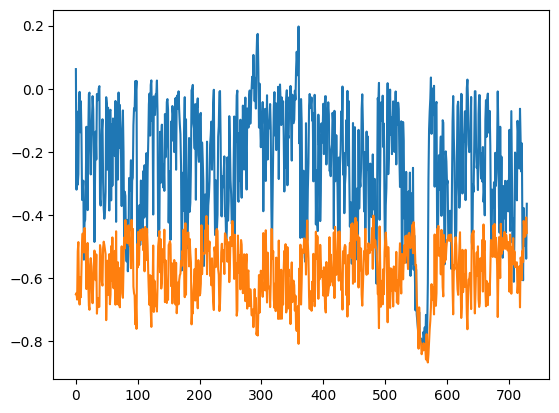

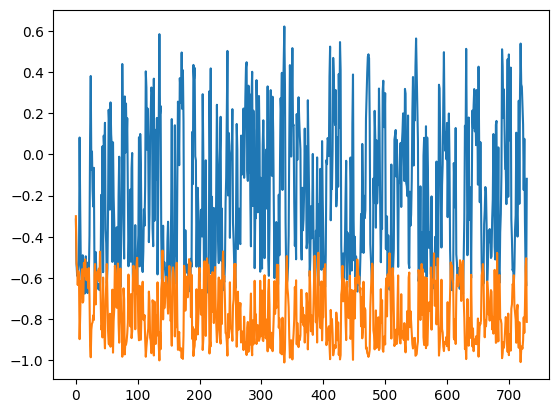

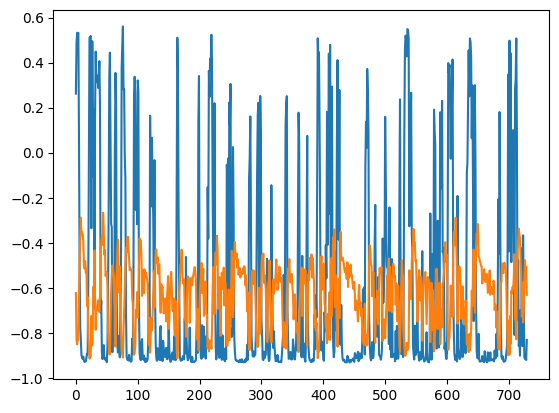

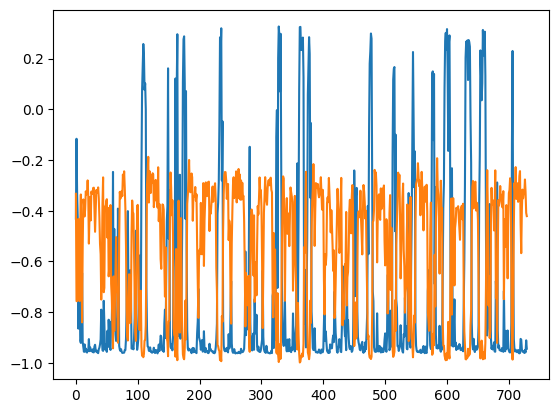

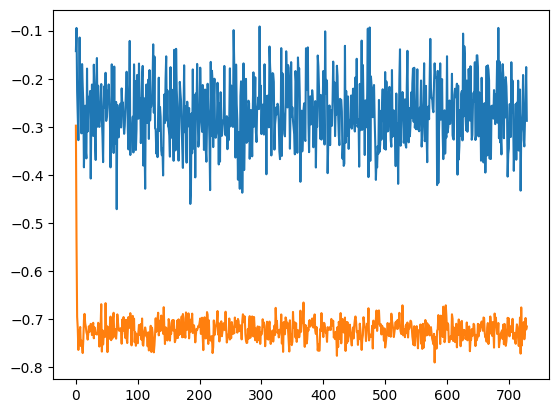

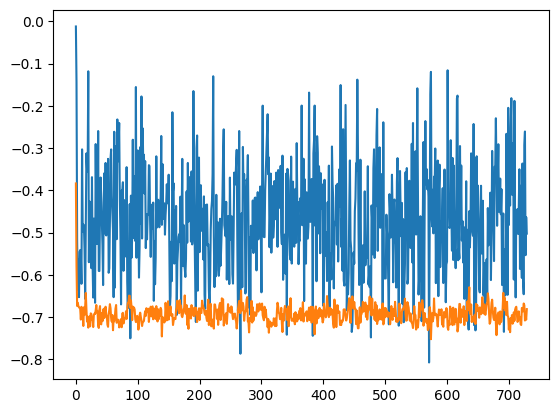

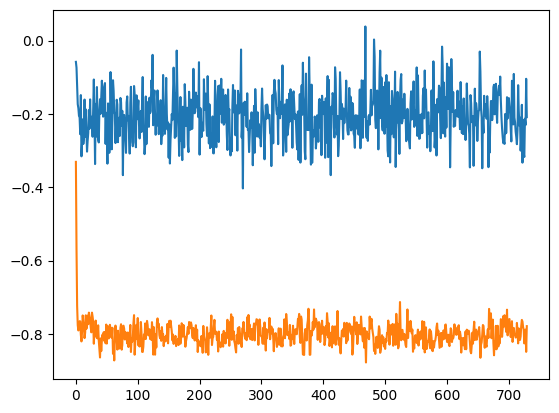

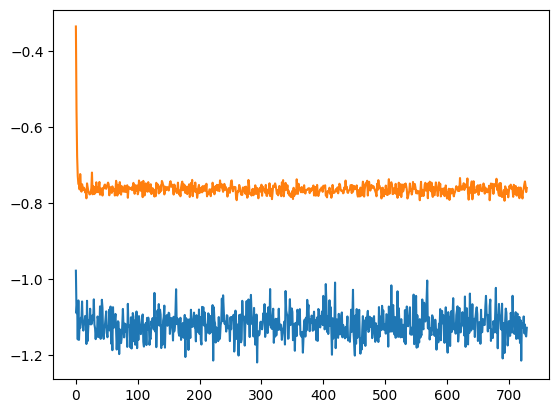

In [49]:
for i in range(10):
    plt.plot(gan_list[i][0][0])
    #plt.xlim(0,100)
    plt.savefig(f'../../el_img{i}.png')
    plt.show()

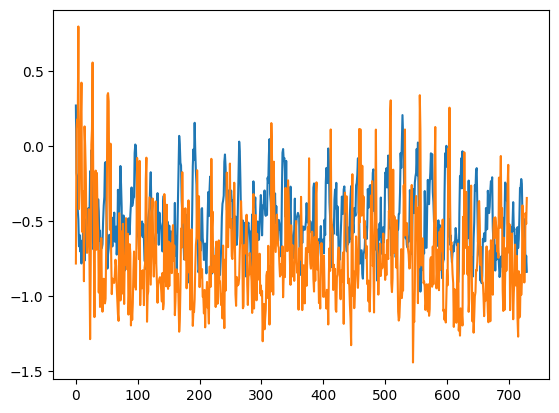

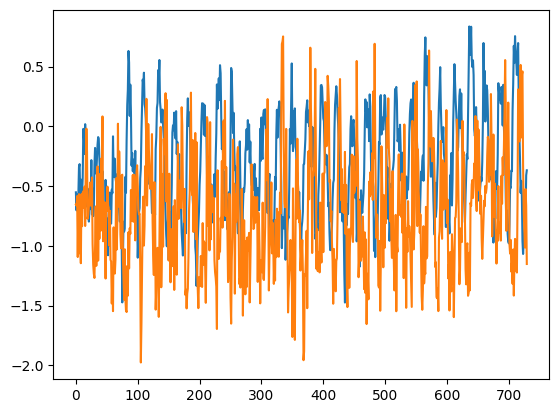

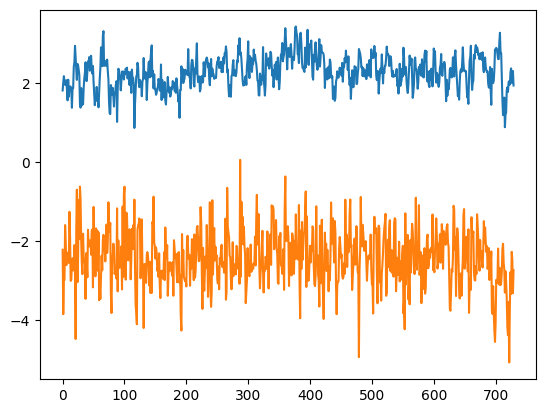

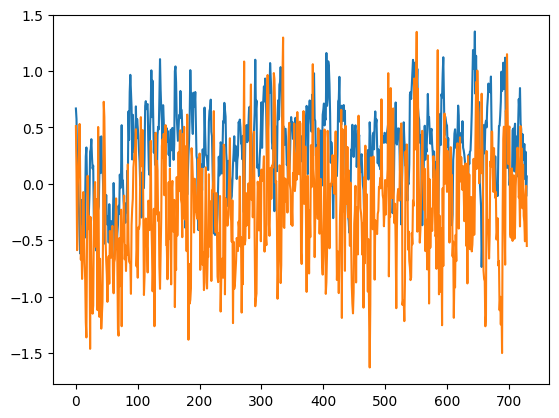

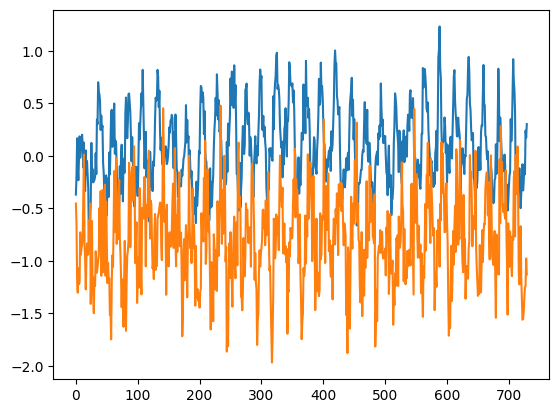

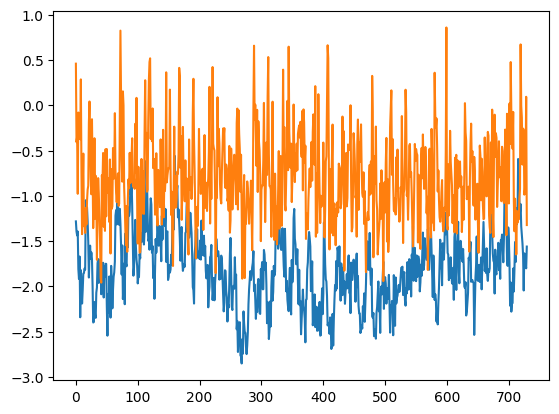

In [51]:
for i in range(6):
    plt.plot(vae_list[i][0][0])
    #plt.xlim(0,100)
    plt.savefig(f'../../el_vaeimg{i}.png')
    plt.show()